A bad experience with a driver can result in a profit loss for transport business, especially for those which have a important influence around the world.

This analysis focus on capturing important aspects of Uber drivers to follow customer satisfaction and be able to improve the business

In [151]:
import pandas as pd
import seaborn as sb
import numpy as np

In [152]:
df = pd.read_csv(r"C:\Users\PC\Desktop\data_analysis-portfolio\datasets\ncr_ride_bookings.csv")



In [153]:
df.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


#### General overview

In [154]:
df.describe()

,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Cancelled Rides by Driver,Incomplete Rides,Booking Value,Ride Distance,Driver Ratings,Customer Rating
count,139500.000000,102000.000000,10500.0,27000.0,9000.0,102000.000000,102000.000000,93000.000000,93000.000000
mean,8.456352,29.149636,1.0,1.0,1.0,508.295912,24.637012,4.230992,4.404584
std,3.773564,8.902577,0.0,0.0,0.0,395.805774,14.002138,0.436871,0.437819
min,2.000000,10.000000,1.0,1.0,1.0,50.000000,1.000000,3.000000,3.000000
25%,5.300000,21.600000,1.0,1.0,1.0,234.000000,12.460000,4.100000,4.200000
50%,8.300000,28.800000,1.0,1.0,1.0,414.000000,23.720000,4.300000,4.500000
75%,11.300000,36.800000,1.0,1.0,1.0,689.000000,36.820000,4.600000,4.800000
max,20.000000,45.000000,1.0,1.0,1.0,4277.000000,50.000000,5.000000,5.000000


#### We can take the unknown reviews made by customers to see the problem.

In [155]:
null_reviews = df[df['Driver Ratings'].isnull()].count()
null_reviews["Vehicle Type"]

np.int64(57000)

#### Now we check all the ratings grouped by vehicle type.

#### We can find there aren`t beneficial for the business cause the average rating is 4.23
#### What's the reason?


In [156]:
vehicles_ratings =df.groupby("Vehicle Type")["Driver Ratings"].mean()
vehicles_ratings

Vehicle Type
Auto             4.232369
Bike             4.230056
Go Mini          4.227694
Go Sedan         4.231812
Premier Sedan    4.234865
Uber XL          4.238340
eBike            4.225614
Name: Driver Ratings, dtype: float64

In [158]:
print("Average rating: " + str(vehicles_ratings.mean()))

Average rating: 4.2315357203573765


<Axes: xlabel='Vehicle Type', ylabel='Driver Ratings'>

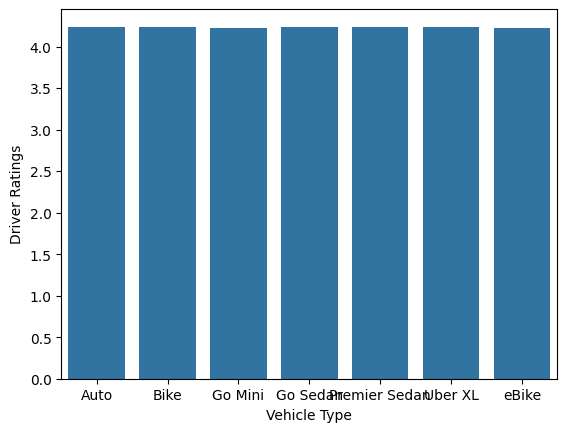

In [157]:
sb.barplot(vehicles_ratings)

#### We can analyze the reason of rides being cancelled

In [ ]:
cancelled_rides = df["Cancelled Rides by Customer"].count() + df["Cancelled Rides by Driver"].count()


In [159]:
df.groupby('Driver Cancellation Reason')["Driver Cancellation Reason"].count()

Driver Cancellation Reason
Customer related issue                 6837
More than permitted people in there    6686
Personal & Car related issues          6726
The customer was coughing/sick         6751
Name: Driver Cancellation Reason, dtype: int64

We find the most prominent reason is because of customers issues.
Let's see how these issues affect ratings.

<Axes: xlabel='Driver Cancellation Reason'>

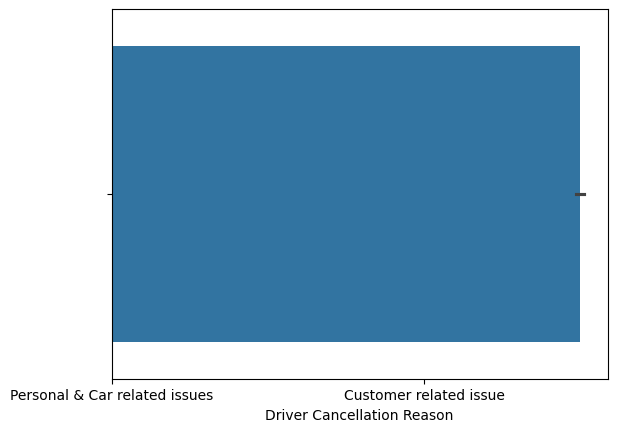